In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,BayesianRidge, Lars,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../data/raw/ar_properties.csv.gz')

In [4]:
pd.set_option('display.max_columns',500)

In [5]:
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,tBwi/HFnXNNLyX7LC+tCPw==,Propiedad,2019-05-28,9999-12-31,2019-05-28,-27.415728,-55.919463,Argentina,Misiones,Posadas,NaN,NaN,NaN,1.0,NaN,NaN,360.0,120.0,1100000.0,ARS,Mensual,Casa venta,Propiedad en muy buena ubicación sobre avenida...,Casa,Venta
1,KzPri1lTn1yh0W446ogmWA==,Propiedad,2019-05-28,9999-12-31,2019-05-28,-34.644404,-58.675289,Argentina,Bs.As. G.B.A. Zona Oeste,Ituzaingó,NaN,NaN,NaN,3.0,NaN,NaN,300.0,165.0,210000.0,USD,Mensual,Casa venta,"HERMOSA PROPIEDAD CON RÁPIDA SALIDA AL ACCESO,...",Casa,Venta
2,0WzY/0EIEvmm9gvBv3THXg==,Propiedad,2019-05-28,9999-12-31,2019-05-28,-34.777494,-58.162576,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,Las Golondrinas,NaN,NaN,4.0,NaN,NaN,685.0,185.0,359000.0,USD,Mensual,Casa venta,Casa A ESTRENAR en B° Privado “Las Golondrinas...,Casa,Venta
3,aBCw3mh2RvxjTq+R+nKPIA==,Propiedad,2019-05-28,9999-12-31,2019-05-28,-34.777494,-58.162576,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,Las Golondrinas,NaN,NaN,4.0,NaN,NaN,760.0,201.0,439000.0,USD,Mensual,Casa venta,Casa a estrenar-B° Privado “LAS GOLONDRINAS” \...,Casa,Venta
4,1rCiWzntzUTuuAZFTKNdsw==,Propiedad,2019-05-28,9999-12-31,2019-05-28,-38.057207,-57.568920,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,NaN,NaN,5.0,NaN,NaN,230.0,165.0,89000.0,USD,Mensual,Casa venta,Chalet en dos Plantas\r\n\r\nPlanta Baja\r\nLi...,Casa,Venta


In [6]:
df = df[df['l2']=='Córdoba']

In [7]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [5]:
#df = df[df['l3']=='Córdoba']

In [6]:
#commonlocations=df['l3'].value_counts()[0:1].index

In [7]:
#df.loc[~df['l3'].isin(commonlocations),'l3'] = 'Interior'

In [8]:
#df['l3'].value_counts()

In [8]:
df = df.drop(columns=['lat','lon','l1','l2','start_date','end_date','id','ad_type','description','title'])

In [9]:
df.head()

,created_on,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type
5,2019-05-28,Villa General Belgrano,NaN,NaN,NaN,4.0,NaN,NaN,576.0,182.0,270000.0,USD,Mensual,Casa,Venta
6,2019-05-28,Villa General Belgrano,NaN,NaN,NaN,6.0,NaN,NaN,1135.0,378.0,350000.0,USD,Mensual,Casa,Venta
7,2019-05-28,Villa General Belgrano,NaN,NaN,NaN,3.0,NaN,NaN,493.0,63.0,135000.0,USD,Mensual,Casa,Venta
8,2019-05-28,Villa General Belgrano,NaN,NaN,NaN,5.0,NaN,NaN,1120.0,270.0,250000.0,USD,Mensual,Casa,Venta
9,2019-05-28,Villa General Belgrano,NaN,NaN,NaN,1.0,NaN,NaN,5000.0,NaN,350000.0,USD,Mensual,Lote,Venta


In [10]:
df.operation_type.unique()

array(['Venta', 'Alquiler', 'Alquiler temporal'], dtype=object)

In [11]:
df = df[df['operation_type']=='Venta']

In [12]:
#df = df[df['property_type']=='Casa']

In [13]:
df.shape

(46814, 15)

In [14]:
df = df.drop(columns=['property_type','operation_type'])

In [15]:
df = df.drop(columns=['price_period','l4','l5','l6'])

In [16]:
df['created_on'] = pd.to_datetime(df['created_on'])

In [17]:
df['created_on'] = df['created_on'].dt.to_period('Y')

In [18]:
df.head()

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency
5,2019,Villa General Belgrano,4.0,NaN,NaN,576.0,182.0,270000.0,USD
6,2019,Villa General Belgrano,6.0,NaN,NaN,1135.0,378.0,350000.0,USD
7,2019,Villa General Belgrano,3.0,NaN,NaN,493.0,63.0,135000.0,USD
8,2019,Villa General Belgrano,5.0,NaN,NaN,1120.0,270.0,250000.0,USD
9,2019,Villa General Belgrano,1.0,NaN,NaN,5000.0,NaN,350000.0,USD


In [19]:
df.dropna(inplace=True)

In [20]:
df = pd.concat([df,pd.get_dummies(df['l3'])],axis=1)

In [21]:
df.drop(columns='l3',inplace=True)

In [22]:
df = pd.concat([df,pd.get_dummies(df['created_on'])],axis=1)

In [23]:
df.drop(columns='created_on',inplace=True)

In [24]:
df = df[df['currency']=='USD']

In [25]:
df.drop(columns='currency',inplace=True)

In [26]:
def drop_outliers(df,listacols):
    for col in listacols:
        IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
        IQR = IQR * 5
        print(IQR)
        df = df.loc[df[col]<IQR]
    return df

In [27]:
df.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Achiras,Agua de Oro,Alta Gracia,Anisacate,Balnearia,Bell Ville,Berrotarán,Bialet Massé,Cabalango,Capilla del Monte,Casa Grande,Colonia San Bartolomé,Colonia Tirolesa,Cosquín,Córdoba,El Tío,Embalse,Estancia Vieja,Falda del Carmen,Hernando,Huerta Grande,Jesús María,La Calera,La Cumbre,La Falda,La Granja,Las Rabonas,Las Varillas,Los Reartes,Malagueño,Malvinas Argentinas,Mendiolaza,Mi Granja,Mina Clavero,Morteros,Nono,Oliva,Potrero de Garay,Pozo del Molle,Punilla,Reducción,Río Ceballos,Río Cuarto,Río Primero,Río Tercero,Saldán,Salsipuedes,San Antonio de Arredondo,San Javier/Yacanto,San Roque,Santa María,Santa Rosa de Calamuchita,Tala Huasi,Tanti,Toledo,Unquillo,Valle Hermoso,Villa Allende,Villa Ascasubi,Villa Carlos Paz,Villa Dolores,Villa General Belgrano,Villa Giardino,Villa María,Villa Parque Siquiman,Villa Rumipal,Villa Santa Cruz del Lago,Villa del Dique,Villa del Rosario,2019,2020
695,3.0,2.0,1.0,103.0,67.0,73906.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
700,3.0,2.0,1.0,77.0,67.0,67550.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
796,4.0,3.0,2.0,120.0,84.0,89500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
867,6.0,3.0,2.0,296.0,204.0,210000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
895,10.0,4.0,3.0,250.0,250.0,250000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
df.surface_total.describe()

count      3378.000000
mean        564.195382
std        3236.715062
min          12.000000
25%          64.000000
50%         182.500000
75%         450.000000
max      142170.000000
Name: surface_total, dtype: float64

In [30]:
df.shape

(3378, 77)

In [28]:
df2 = drop_outliers(df,['surface_covered','surface_total','price'])
df2.shape

590.0
1940.0
400000.0


(3157, 77)

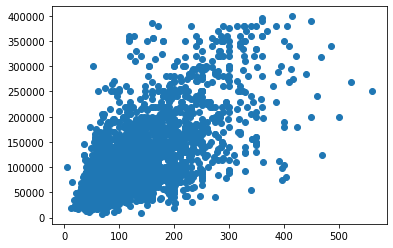

In [29]:
plt.scatter(df2['surface_covered'],df2['price'])

In [30]:
y = df2['price']

In [31]:
X = df2[['surface_covered']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
models = [LinearRegression(),Lars(),Lasso(),Ridge(),BayesianRidge(),RandomForestRegressor()]

In [34]:
for model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    mean_squared_error(y_test,predictions)
    print(r2_score(y_test,predictions))

0.3956857482453858
0.3956857482453858
0.39568576046411097
0.39568575113289073
0.395707185206965
0.4069863739798597


In [38]:
list(zip(predictions,y_test))

[(109303.25063985946, 45000.0),
 (60854.26633929767, 109999.0),
 (218506.4003419082, 330000.0),
 (99365.14256977974, 125000.0),
 (124553.38445545682, 97000.0),
 (67229.43570859372, 95000.0),
 (89164.87344912963, 65000.0),
 (59737.06690791751, 78000.0),
 (176911.8333333333, 360000.0),
 (65108.18327058578, 67000.0),
 (77769.96326122983, 102080.0),
 (84355.69314995184, 42000.0),
 (80838.53366660952, 69500.0),
 (119282.12499999999, 149999.0),
 (56293.94970946795, 54900.0),
 (65371.35567453776, 55000.0),
 (65108.18327058578, 75000.0),
 (140907.4761904762, 81000.0),
 (100728.80452380952, 99000.0),
 (119260.89285714286, 50000.0),
 (89116.59297292352, 149000.0),
 (91674.20314884723, 109800.0),
 (122099.88900741294, 65000.0),
 (59737.06690791751, 41500.0),
 (290733.86351148854, 119000.0),
 (40144.63333333333, 38000.0),
 (58387.18720424929, 62000.0),
 (89116.59297292352, 75000.0),
 (77152.07323953824, 43900.0),
 (164377.57492507494, 99000.0),
 (69166.34841192809, 75000.0),
 (69166.34841192809, 8

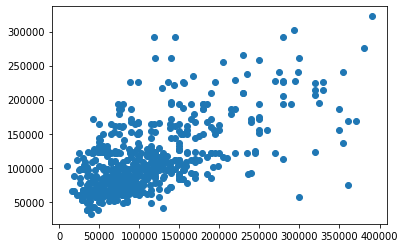

In [35]:
plt.scatter(y_test,predictions)